# Assignment 2

This project is using NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. 

Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

The following variables are provided:
* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [44]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'6b179b701cddfffbf4dc1b9bcd8758b42f034daacafa6cf9c09e8931')

In [60]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/6b179b701cddfffbf4dc1b9bcd8758b42f034daacafa6cf9c09e8931.csv')
df = df.sort_values(by=['Date', 'ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134903 entries, 98206 to 119340
Data columns (total 4 columns):
ID            134903 non-null object
Date          134903 non-null object
Element       134903 non-null object
Data_Value    134903 non-null int64
dtypes: int64(1), object(3)
memory usage: 5.1+ MB


In [61]:
df.head(10)

,ID,Date,Element,Data_Value
98206,USC00044838,2005-01-01,TMAX,50
98220,USC00044838,2005-01-01,TMIN,-89
131647,USC00350304,2005-01-01,TMIN,-22
131894,USC00350304,2005-01-01,TMAX,83
123346,USC00353445,2005-01-01,TMIN,17
123355,USC00353445,2005-01-01,TMAX,72
125032,USC00354060,2005-01-01,TMAX,-6
125033,USC00354060,2005-01-01,TMIN,-56
87416,USC00357391,2005-01-01,TMAX,94
87424,USC00357391,2005-01-01,TMIN,-11


In [62]:
df['Year'] = df['Date'].apply(lambda x: x[:4])
df['Date'] = df['Date'].apply(lambda x: x[-5:])
df = df[df['Date'] != '02-29']
df_before_2015 = df[~(df['Year'] == '2015')]
df_2015 = df[df['Year'] == '2015']
df_before_2015.head()

,ID,Date,Element,Data_Value,Year
98206,USC00044838,01-01,TMAX,50,2005
98220,USC00044838,01-01,TMIN,-89,2005
131647,USC00350304,01-01,TMIN,-22,2005
131894,USC00350304,01-01,TMAX,83,2005
123346,USC00353445,01-01,TMIN,17,2005


In [63]:
max_b_2015 = df_before_2015.groupby('Date').agg({'Data_Value':np.max})
min_b_2015 = df_before_2015.groupby('Date').agg({'Data_Value':np.min})
max_2015 = df_2015.groupby('Date').agg({'Data_Value':np.max})
min_2015 = df_2015.groupby('Date').agg({'Data_Value':np.min})
all_max = pd.merge(max_b_2015.reset_index(), max_2015.reset_index(), left_index=True, on = 'Date')
all_min = pd.merge(min_b_2015.reset_index(), min_2015.reset_index(), left_index=True, on = 'Date')

In [64]:
record_max = all_max[all_max['Data_Value_y'] > all_max['Data_Value_x']]
record_min = all_min[all_min['Data_Value_y'] < all_min['Data_Value_x']]
record_max.head()

,Date,Data_Value_x,Data_Value_y
5,01-06,183,200
6,01-07,161,206
7,01-08,156,194
24,01-25,217,228
27,01-28,167,172


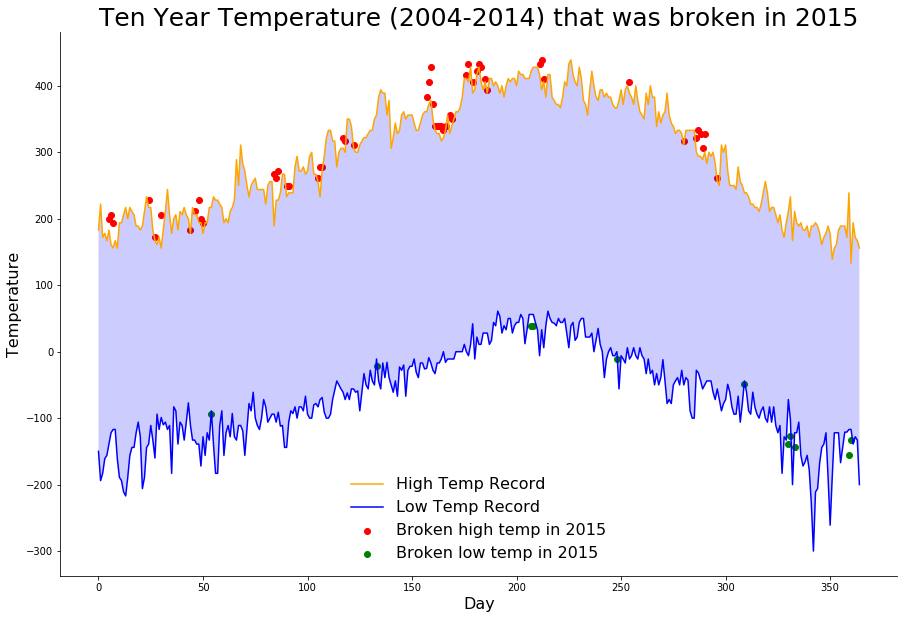

In [88]:
%matplotlib inline
# import numpy as np 
# import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(max_b_2015.values, c='orange', label='High Temp Record')
plt.plot(min_b_2015.values, c='blue', label='Low Temp Record')

plt.scatter(record_max.index.tolist(), record_max['Data_Value_y'].values, c = 'red', label = "Broken high temp in 2015")
plt.scatter(record_min.index.tolist(), record_min['Data_Value_y'].values, c = 'green', label = "Broken low temp in 2015")

plt.xlabel('Day', fontsize=16)
plt.ylabel('Temperature', fontsize=16)
plt.title('Ten Year Temperature (2004-2014) that was broken in 2015', fontsize=25)

plt.legend(loc=8, frameon=False, fontsize=16)
plt.gca().fill_between(range(len(min_b_2015)), 
                       np.array(max_b_2015.values.reshape(len(min_b_2015.values),)), 
                       np.array(min_b_2015.values.reshape(len(min_b_2015.values),)), 
                       facecolor='blue', 
                       alpha=0.20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
